In [99]:
import os
import numpy as np
import matplotlib.pyplot as plt
dict = {"NSCLC1_":[1200,900,100],
        "NSCLC2_":[1200,300,80],
        "NSCLC5_":[1200,1400,100],
        "NSCLC6_":[1200,400,100],
        "NSCLC7_":[1200,2200,100],
        "NSCLC10":[1200,500,100],
        "NSCLC11":[1200,1600,200],
        "NSCLC16":[1200,500, 100]}
input_file= "C:/Users/Rhydian/Documents/Work/MPhysProject/nparrays/inside"

array_names = os.listdir(input_file)
    

NSCLC16scan6NSCLC16_.npy


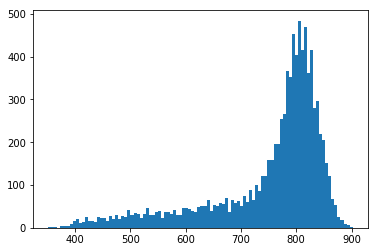

In [107]:
array_name = array_names[12]
print(array_name)
info_array = dict[array_name[0:7]]
arr = np.load(os.path.join(input_file,array_name))
values, bins, _ = plt.hist(arr[~np.isnan(arr)], bins = info_array[2])
plt.show()

In [89]:
from sklearn.neighbors.kde import KernelDensity
specialboy = zip(bins,values)
my_matrix = []
for i in list(specialboy):
    my_matrix.append(list(i))

"""kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(my_matrix)
samples = kde.sample(1000)
samples = np.array(samples)
plt.scatter(samples[:,0],samples[:,1])
plt.show()"""

"kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(my_matrix)\nsamples = kde.sample(1000)\nsamples = np.array(samples)\nplt.scatter(samples[:,0],samples[:,1])\nplt.show()"

In [90]:
print(len(values))
print(len(bins))
bins_median = []
for i in range(1,len(bins)):
    bins_median.append(0.5*(bins[i-1]+bins[i]))

bins = bins_median
    
print(len(bins))

100
101
100


In [91]:
import numpy as np
import pylab as pl
import scipy as sp

def make_double_gaussian(hd,parms):
    
    a1,mu1,sig1,a2,mu2,sig2 = parms
    
    vals = a1*np.exp(-1.*(hd-mu1)**2/(2.*sig1**2)) + a2*np.exp(-1.*(hd-mu2)**2/(2.*sig2**2))
    
    return vals

def nll(parms,hd,vals):
    
    test = make_double_gaussian(hd,parms)
    
    # Poisson negative loglikelihood:
    # NOTE: if there are any zero-valued data points in
    # your prediction (test) this will return a NaN.
    ll = -np.sum(test) + np.sum(vals*np.log(test)) - np.sum(sp.special.gammaln(vals + 1))
    nll = -1.*ll
    
    # L2 norm:
    #nll = np.sum((test - vals)**2)
    
    return nll

def make_triple_gaussian(hd,parms):
    
    a1,mu1,sig1,a2,mu2,sig2,a3,mu3,sig3 = parms
    
    vals = a1*np.exp(-1.*(hd-mu1)**2/(2.*sig1**2)) + a2*np.exp(-1.*(hd-mu2)**2/(2.*sig2**2)) + a3*np.exp(-1.*(hd-mu3)**2/(2.*sig3**2))
    
    return vals



def nll3(parms,hd,vals):
    
    test = make_triple_gaussian(hd,parms)
    
    # Poisson negative loglikelihood:
    # NOTE: if there are any zero-valued data points in
    # your prediction (test) this will return a NaN.
    ll = -np.sum(test) + np.sum(vals*np.log(test)) - np.sum(sp.special.gammaln(vals + 1))
    nll = -1.*ll
    
    # L2 norm:
    #nll = np.sum((test - vals)**2)
    
    return nll

import scipy.optimize as op
bounds = [(50.,100.),(400.,600.),(50.,200.),(300,500),(700,900),(30,200)]
bounds_3 = [(0.,100.),(400.,600.),(50.,200.),(0.,500),(700,900),(30,200),(0,100),(500,750),(50,200)]
p0 = [1.,400.,50.,1.,900.,50.]
p0_3 = [1.,400.,50.,1.,900.,50.,1.,650.,50.]

popt = op.minimize(nll3, p0_3, bounds = bounds_3, args=(bins,values))

print(popt.x)


[  45.86453409  497.30155868   50.          340.00646136  798.84557206
   35.84983815   49.88695497  718.72233006  121.6922751 ]


[array([  97.80680754,  423.31940378,   60.48715634,  217.70965062,
        785.29554546,   48.46547752,   54.05439029,  656.6304218 ,
         64.13708972]), array([  11.69141341,  540.10707265,   71.78296953,  407.08437955,
        802.83397484,   36.33989108,   55.46343496,  744.41892193,
         78.39828986]), array([  41.51563368,  531.87212359,   78.28054895,  429.56491346,
        817.79507078,   30.3109401 ,   94.59623355,  750.        ,
         59.10116206]), array([  45.86453409,  497.30155868,   50.        ,  340.00646136,
        798.84557206,   35.84983815,   49.88695497,  718.72233006,
        121.6922751 ])]


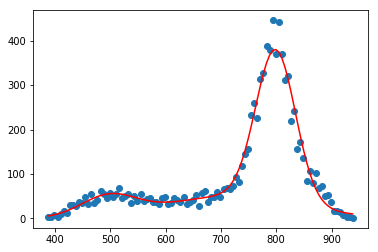

In [92]:
fitted = make_triple_gaussian(bins,popt.x)
try:
    previous_values.append(popt.x)
    print(previous_values)
except:
    previous_values = [popt.x]
pl.subplot(111)
pl.scatter(bins,values)
pl.plot(bins,fitted,c='r')
pl.show()


In [98]:
for element in previous_values:
    print(element[1])

print("\n Second Peaks \n")
for element in previous_values:
    print(element[4])
    

423.319403781
540.107072651
531.872123591
497.301558682

 Second Peaks 

785.295545464
802.833974844
817.79507078
798.845572061
